# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import layers, models, regularizers
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:\\Users\\lenovo\\Desktop\\ASSIGNEMENT\\DLAssignments\\Data\\compresive_strength_concrete.csv")

In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
data.shape

(1030, 9)

In [6]:
# Check Missing Values ( If Exist ; Fill each record with mean of its feature )

data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
np.where(data.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [8]:
#Splitting Data into train and test data
# sanple will pick 70% random rows from the data
train_data = data.sample(frac = 0.7, random_state = 123)
test_data = data.drop(train_data.index)

In [9]:
train_data.shape, test_data.shape, len(data)

((721, 9), (309, 9), 1030)

In [10]:
train_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
134,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.33
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28,26.86
770,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3,14.99
937,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28,36.80


In [11]:
# Spliting data and labels

train_data = train_data.iloc[:,0:-1]
train_label = train_data.iloc[:,-1]
test_data = test_data.iloc[:,0:-1]
test_label = test_data.iloc[:,-1]


In [12]:
#Normalization of training and Test Data
X_mean = train_data.mean()
train_data -= X_mean
X_std = train_data.std()
train_data /= X_std
test_data -= X_mean
test_data /= X_std

In [13]:
#Normalization of training and Test labels
Y_mean = train_label.mean()
train_label -= Y_mean
Y_std = train_label.std()
train_label /= Y_std
test_label -= Y_mean
test_label /= Y_std

In [14]:
train_data.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                float64
dtype: object

In [15]:
# Converting dtype to Numpy before giving data to model.
train_data = train_data.to_numpy()
train_label = train_label.to_numpy()
test_data = test_data.to_numpy()
test_label = test_label.to_numpy()


In [16]:
network = models.Sequential()
network.add(layers.Dense(128,activation="relu",input_shape=(train_data.shape[1],)))
network.add(layers.Dense(64,activation="relu"))
network.add(layers.Dense(32,activation="relu"))
network.add(layers.Dense(1))
network.compile(optimizer="rmsprop",loss=["mse"],metrics=["mae"])

In [22]:
history = network.fit(train_data, train_label,epochs=200,validation_split=0.3, batch_size = 16)

Epoch 1/200
32/32 [==============================] - 2s 32ms/step - loss: 0.5453 - mae: 0.3832 - val_loss: 0.0358 - val_mae: 0.1445
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0228 - mae: 0.1054 - val_loss: 0.0122 - val_mae: 0.0915
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0119 - mae: 0.0815 - val_loss: 0.0058 - val_mae: 0.0589
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0084 - mae: 0.0691 - val_loss: 0.0116 - val_mae: 0.0871
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0076 - mae: 0.0624 - val_loss: 0.0067 - val_mae: 0.0630
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0079 - mae: 0.0617 - val_loss: 0.0111 - val_mae: 0.0766
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0100 - mae: 0.0713 - val_loss: 0.0043 - val_mae: 0.0486
Epoch 8/200
32/32 [==============================] - 0s 7ms/step - loss: 0.0071 - 

32/32 [==============================] - 0s 5ms/step - loss: 0.0015 - mae: 0.0266 - val_loss: 0.0022 - val_mae: 0.0349
Epoch 64/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0019 - mae: 0.0285 - val_loss: 0.0013 - val_mae: 0.0286
Epoch 65/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0039 - mae: 0.0319 - val_loss: 0.0154 - val_mae: 0.0859
Epoch 66/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0056 - mae: 0.0389 - val_loss: 0.0015 - val_mae: 0.0247
Epoch 67/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0015 - mae: 0.0258 - val_loss: 7.5652e-04 - val_mae: 0.0198
Epoch 68/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0025 - mae: 0.0270 - val_loss: 0.0038 - val_mae: 0.0490
Epoch 69/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0032 - mae: 0.0361 - val_loss: 0.0010 - val_mae: 0.0230
Epoch 70/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0018 - ma

32/32 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0242 - val_loss: 0.0028 - val_mae: 0.0301
Epoch 125/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0020 - mae: 0.0251 - val_loss: 6.3456e-04 - val_mae: 0.0174
Epoch 126/200
32/32 [==============================] - 0s 5ms/step - loss: 8.9364e-04 - mae: 0.0207 - val_loss: 0.0057 - val_mae: 0.0382
Epoch 127/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0014 - mae: 0.0217 - val_loss: 6.5936e-04 - val_mae: 0.0184
Epoch 128/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0011 - mae: 0.0201 - val_loss: 0.0020 - val_mae: 0.0264
Epoch 129/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0019 - mae: 0.0240 - val_loss: 0.0137 - val_mae: 0.0568
Epoch 130/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0196 - val_loss: 0.0089 - val_mae: 0.0537
Epoch 131/200
32/32 [==============================] - 0s 5ms/step - lo

Epoch 184/200
32/32 [==============================] - 0s 5ms/step - loss: 5.5027e-04 - mae: 0.0154 - val_loss: 8.8165e-04 - val_mae: 0.0185
Epoch 185/200
32/32 [==============================] - 0s 6ms/step - loss: 7.4668e-04 - mae: 0.0158 - val_loss: 0.0019 - val_mae: 0.0219
Epoch 186/200
32/32 [==============================] - 0s 7ms/step - loss: 8.5524e-04 - mae: 0.0179 - val_loss: 0.0017 - val_mae: 0.0291
Epoch 187/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0014 - mae: 0.0212 - val_loss: 8.5560e-04 - val_mae: 0.0209
Epoch 188/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0016 - mae: 0.0194 - val_loss: 3.6302e-04 - val_mae: 0.0138
Epoch 189/200
32/32 [==============================] - 0s 5ms/step - loss: 5.5056e-04 - mae: 0.0152 - val_loss: 0.0039 - val_mae: 0.0331
Epoch 190/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0010 - mae: 0.0195 - val_loss: 2.7753e-04 - val_mae: 0.0121
Epoch 191/200
32/32 [================

In [23]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [24]:
loss,mae=network.evaluate(test_data,test_label)

10/10 [==============================] - 0s 1ms/step - loss: 8.3693e-04 - mae: 0.0200


In [25]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

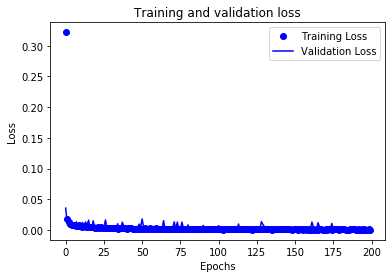

In [26]:
import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(200)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

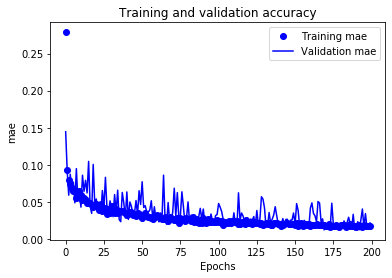

In [27]:
import matplotlib.pyplot as plt 
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [28]:
y_pred = network.predict(test_data)

In [29]:
def denorm(x):
    return (x * Y_std) + Y_mean
    

In [30]:
y_pred = denorm(y_pred)

In [31]:
y_true = denorm(test_label)

In [32]:
y_pred = y_pred.flatten()

In [33]:
y_pred.shape

(309,)

In [34]:
y_true.shape

(309,)

(0, 100)

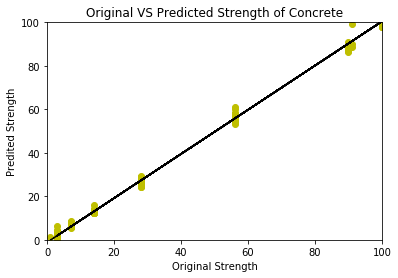

In [39]:
coef = np.polyfit(y_true,y_pred,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
plt.title("Original VS Predicted Strength of Concrete")
plt.xlabel('Original Strength' )
plt.ylabel('Predited Strength' )
plt.xlim(0, 100)
plt.ylim(0, 100)